# Import Libaries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
global cnt 

# Read Image

In [18]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/paddy.jpeg"
    img = plt.imread(path)
    grayscal = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    return img, grayscal

# Opencv Neighborhood Processing

In [19]:
def neighborhood_opencv(img,kernel):
    image = cv.filter2D(grayscal,-1,kernel,cv.BORDER_ISOLATED)
    return image

# Neighborhood Processing Compare

In [20]:
def compare(A,B):
    print(B.shape)
    height,width = B.shape
    errorL2 = cv.norm( A, B, cv.NORM_L2 )
    similarity = 1 - errorL2 / ( height * width )
    print('Similarity = ',similarity)


# Kernel Build

In [21]:
def kernel_build():
    kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    kernel3 = np.array([[2, 1, 0], [1, 0, -1], [0, 1, -2]])
    kernel4 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    kernel5 = np.array([[1, 0 , 2], [0,  0, 0], [-1, 0 , -2]])
    kernel6 = np.array([[-1, -1, 2], [-1, 2, -1], [-1, -1, 2]])
    kernel = [kernel1,kernel2,kernel3,kernel4,kernel5,kernel6]
    return kernel3

In [22]:
def convolution2d(image, kernel, pad):
    m, n = kernel.shape
    image = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_CONSTANT, value=0)
    y, x = image.shape
    y_out = y - m + 1
    x_out  = x - n + 1
    new_image = np.zeros((y_out, x_out))
    for i in range(y_out):
        for j in range(x_out):
            new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
    return new_image

In [29]:
def convolution2d1(image, kernel):
    m, n = kernel.shape
    pad= 1
    image = np.pad(image,1,constant_values = 0)

    r, c = image.shape
   
    new_image = np.zeros((r, c))
    
    for i in range(r-2):
        for j in range(c-2):
            s = np.sum(image[i:i+m, j:j+n]*kernel)
            s = min(255,s)
            s = max(0,s)
            new_image[i][j] =s 
    return new_image[1:-1,1:-1]

In [30]:
def hisogram_opencv(img,img1):
    histr = cv.calcHist([img],[0],None,[256],[0,256])
    histr1 = cv.calcHist([img1],[0],None,[256],[0,256])
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(histr)
    plt.subplot(1,2,2)
    plt.plot(histr1)
    plt.title("Histogram")
    plt.show()
    

# Main

Image Shape and Size (751, 1000) 751000
shape  (751, 1000)


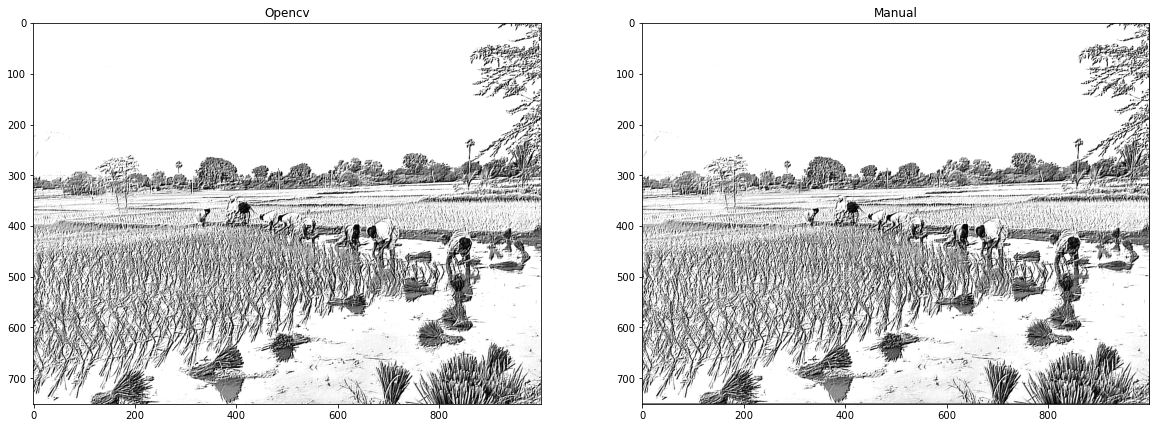

255.0


In [31]:
if __name__ == "__main__":
    img, grayscal = read_image()
    print("Image Shape and Size",grayscal.shape, grayscal.size)
    kernel = kernel_build()
    img_manual = convolution2d1(grayscal,kernel)
    print("shape ", img_manual.shape)
    img_opencv = neighborhood_opencv(grayscal,kernel)
    #compare(img_manual,img_opencv)


    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(img_opencv,cmap = 'gray')
    plt.title("Opencv")
    plt.subplot(1,2,2)
    plt.imshow(img_manual,cmap = 'gray')
    plt.title("Manual")
    plt.savefig("sd.jpg")
    plt.show()

    
    print(img_manual.max())
    